<a href="https://colab.research.google.com/github/stlankiro/ML_predict_repo/blob/main/Copy_of_starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 53503

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stlankiro/ML_predict_repo/main/df_train.csv', index_col=0)
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
#dataset dimensions
df.shape

(8763, 48)

In [4]:
#looking at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [5]:
# look at data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


In [ ]:
# plot relevant feature interactions

In [ ]:
#the city of Madrid
df.loc[:, df.columns.str.startswith('Madrid')]

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
0,0.666667,64.000000,0.000000,0.0,800.000000,971.333333,265.938000,265.938000,265.938000
1,0.333333,64.666667,0.000000,0.0,800.000000,972.666667,266.386667,266.386667,266.386667
2,1.000000,64.333333,0.000000,0.0,800.000000,974.000000,272.708667,272.708667,272.708667
3,1.000000,56.333333,0.000000,0.0,800.000000,994.666667,281.895219,281.895219,281.895219
4,1.000000,57.000000,0.000000,0.0,800.000000,1035.333333,280.678437,280.678437,280.678437
...,...,...,...,...,...,...,...,...,...
8758,1.000000,95.666667,45.000000,0.0,727.666667,1024.000000,280.816667,279.686667,278.483333
8759,5.000000,85.000000,85.000000,0.0,762.000000,1023.666667,283.483333,282.400000,280.150000
8760,6.333333,71.000000,85.000000,0.1,702.333333,1021.666667,285.150000,283.956667,281.150000
8761,7.333333,79.000000,56.666667,0.3,500.000000,1023.000000,283.483333,282.666667,280.816667


In [ ]:
#city of Valencia
df.loc[:, df.columns.str.startswith('Valencia')]

,Valencia_wind_deg,Valencia_wind_speed,Valencia_snow_3h,Valencia_pressure,Valencia_temp_max,Valencia_temp,Valencia_humidity,Valencia_temp_min
0,level_5,0.666667,0.0,1002.666667,269.888000,269.888000,75.666667,269.888000
1,level_10,1.666667,0.0,1004.333333,271.728333,271.728333,71.000000,271.728333
2,level_9,1.000000,0.0,1005.333333,278.008667,278.008667,65.666667,278.008667
3,level_8,1.000000,0.0,1009.000000,284.899552,284.899552,54.000000,284.899552
4,level_7,1.000000,0.0,NaN,283.015115,283.015115,58.333333,283.015115
...,...,...,...,...,...,...,...,...
8758,level_6,2.666667,0.0,NaN,282.483333,282.483333,71.333333,282.483333
8759,level_6,2.000000,0.0,1021.000000,291.816667,291.816667,40.333333,291.816667
8760,level_9,7.333333,0.0,1009.666667,290.706333,290.706333,44.666667,290.706333
8761,level_8,7.333333,0.0,1020.000000,290.483333,290.483333,45.000000,290.483333


In [ ]:
#Bilbao
df.loc[:, df.columns.str.startswith('Bilbao')]

,Bilbao_rain_1h,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_snow_3h,Bilbao_pressure,Bilbao_weather_id,Bilbao_temp_min,Bilbao_temp,Bilbao_temp_max
0,0.0,0.000000,1.000000,223.333333,0.0,1035.000000,800.000000,269.338615,269.338615,269.338615
1,0.0,0.000000,1.000000,221.000000,0.0,1035.666667,800.000000,270.376000,270.376000,270.376000
2,0.0,0.000000,1.000000,214.333333,0.0,1036.000000,800.000000,275.027229,275.027229,275.027229
3,0.0,0.000000,1.000000,199.666667,0.0,1036.000000,800.000000,281.135063,281.135063,281.135063
4,0.0,2.000000,0.333333,185.000000,0.0,1035.333333,800.000000,282.252063,282.252063,282.252063
...,...,...,...,...,...,...,...,...,...,...
8758,0.0,56.666667,4.333333,226.666667,0.0,1017.666667,802.333333,285.150000,287.573333,290.150000
8759,0.0,26.666667,8.000000,220.000000,0.0,1015.333333,801.333333,286.483333,288.616667,291.150000
8760,0.4,63.333333,8.333333,283.333333,0.0,1017.333333,601.000000,283.816667,285.330000,286.816667
8761,0.2,63.333333,2.666667,220.000000,0.0,1020.333333,634.166667,278.816667,281.410000,284.150000


In [ ]:
#Barcelona
df.loc[:, df.columns.str.startswith('Barcelona')]

,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_pressure,Barcelona_rain_3h,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min
0,6.333333,42.666667,0.0,1036.333333,0.0,800.0,281.013000,281.013000,281.013000
1,4.000000,139.000000,0.0,1037.333333,0.0,800.0,280.561667,280.561667,280.561667
2,2.000000,326.000000,0.0,1038.000000,0.0,800.0,281.583667,281.583667,281.583667
3,2.333333,273.000000,0.0,1037.000000,0.0,800.0,283.434104,283.434104,283.434104
4,4.333333,260.000000,0.0,1035.000000,0.0,800.0,284.213167,284.213167,284.213167
...,...,...,...,...,...,...,...,...,...
8758,1.666667,83.666667,0.0,1021.000000,0.0,801.0,282.150000,281.276667,280.483333
8759,3.000000,213.333333,0.0,1019.000000,0.0,801.0,287.816667,287.483333,287.150000
8760,5.333333,256.666667,0.0,1015.666667,0.0,801.0,290.483333,289.816667,289.150000
8761,5.333333,250.000000,0.0,1015.000000,0.0,800.0,288.150000,287.523333,286.816667


In [ ]:
# evaluate correlation
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


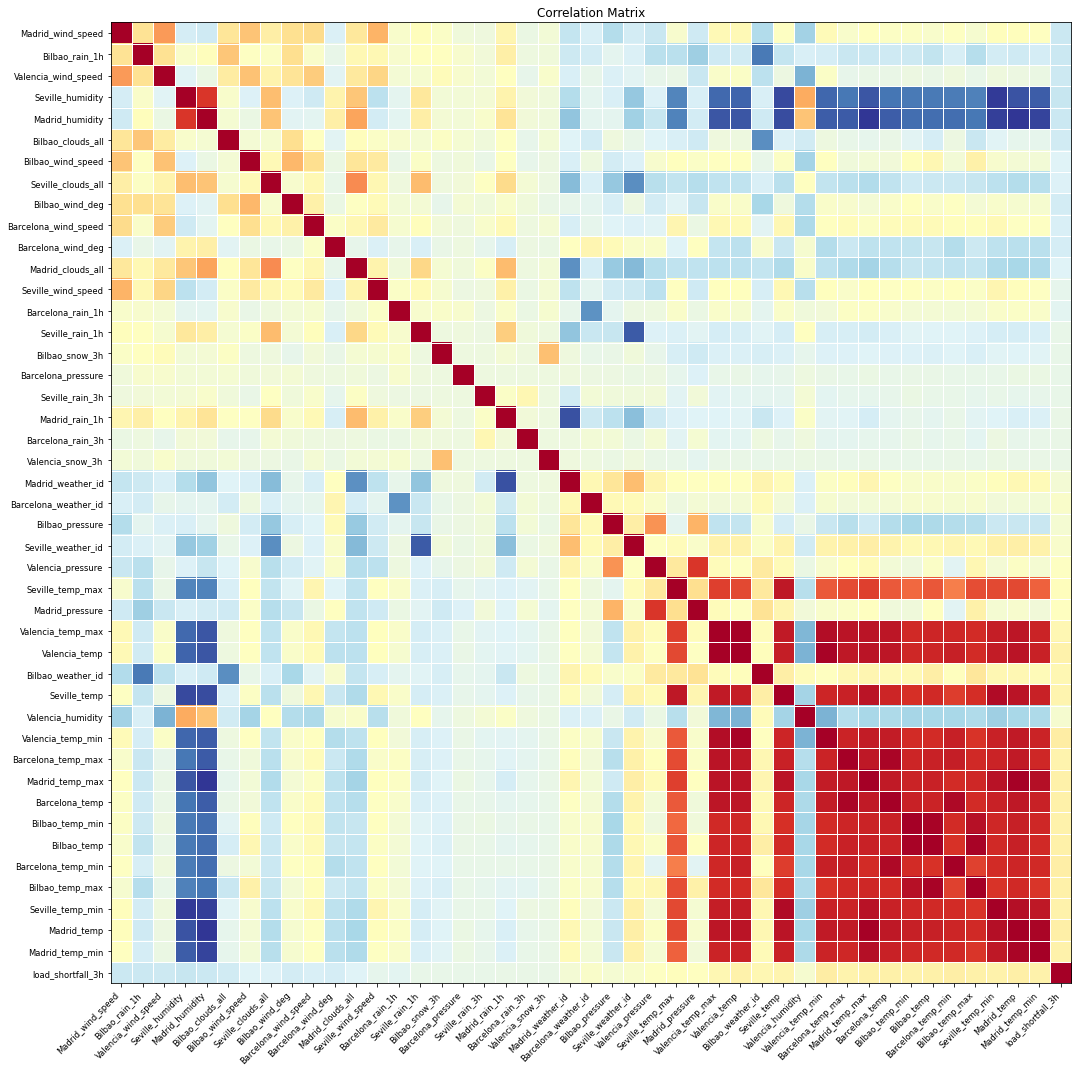

In [ ]:
#correlation heatmap
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63c0b7fc90>,
      dtype=object)

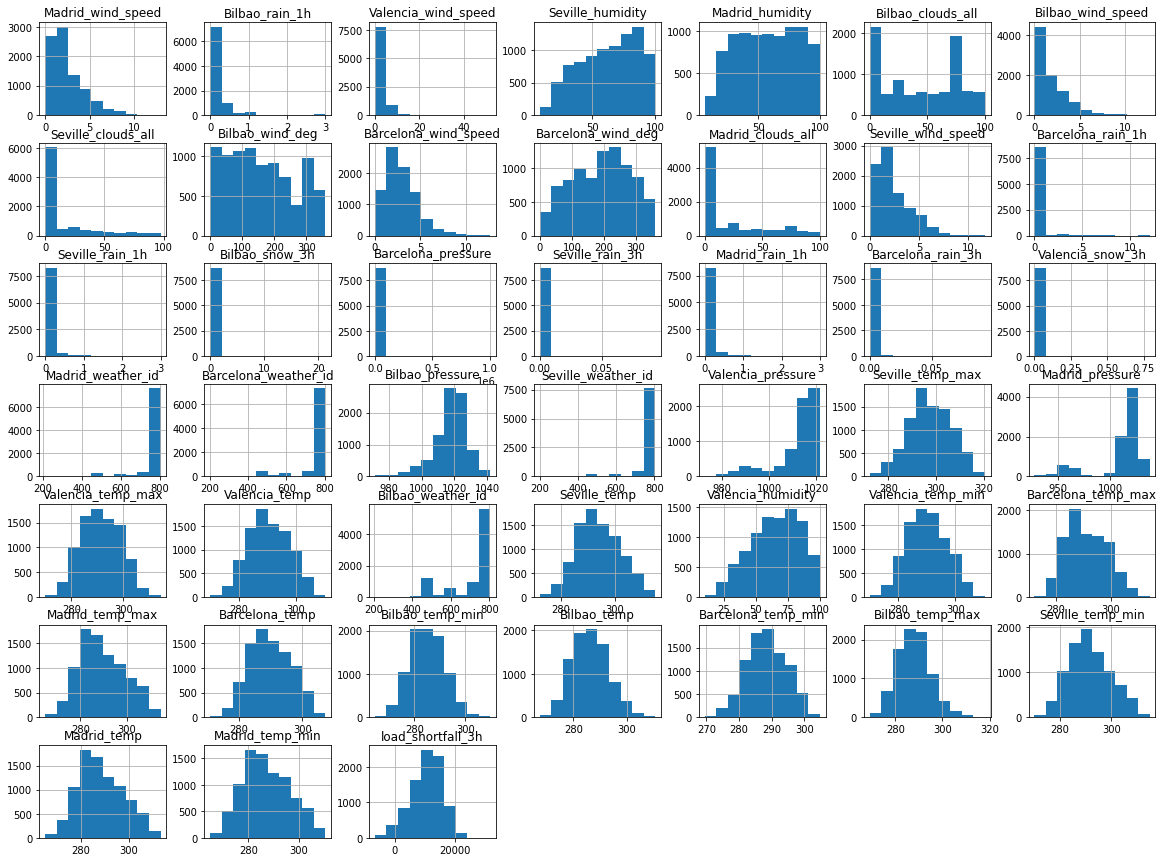

In [ ]:
# have a look at feature distributions
df.hist(figsize=(20,15))

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [3]:
#finding missing values
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [4]:
#looking at Valencia_pressure
df['Valencia_pressure']

0       1002.666667
1       1004.333333
2       1005.333333
3       1009.000000
4               NaN
           ...     
8758            NaN
8759    1021.000000
8760    1009.666667
8761    1020.000000
8762            NaN
Name: Valencia_pressure, Length: 8763, dtype: float64

In [4]:
#statistics for Valencia pressure
df.Valencia_pressure.describe()

count    6695.000000
mean     1012.051407
std         9.506214
min       972.666667
25%      1010.333333
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

In [5]:
# remove missing values/ features
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean())

In [6]:
#checking for null values again
df.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [7]:
# create dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,0,0,1,0,0,0,0,0,0,0
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,0,0,1,0,0,0,0,0,0,0
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,0,0,1,0,0,0,0,0,0,0
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,0,0,1,0,0,0,0,0,0,0
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,0,0,1,0,0,0,0,0,0,0


In [8]:
# dimensions
df_dummies.shape

(8763, 8843)

In [8]:
# move load shortfall to last column
column_titles = [col for col in df_dummies.columns if col != 'load_shortfall_3h'] + ['load_shortfall_3h']
df_dummies=df_dummies.reindex(columns=column_titles)
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [9]:
#drop some columns
df_dummies = pd.get_dummies(df, drop_first=True)

# Reorder columns with the dependent variable at the last column
column_titles = [col for col in df_dummies.columns if col !='load_shortfall_3h'] + ['load_shortfall_3h']
df_dummies = df_dummies.reindex(columns=column_titles)

df_dummies.head(10)

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,load_shortfall_3h
0,0.666667,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,223.333333,6.333333,...,0,1,0,0,0,0,0,0,0,6715.666667
1,0.333333,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,221.000000,4.000000,...,0,1,0,0,0,0,0,0,0,4171.666667
2,1.000000,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,214.333333,2.000000,...,0,1,0,0,0,0,0,0,0,4274.666667
3,1.000000,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,199.666667,2.333333,...,0,1,0,0,0,0,0,0,0,5075.666667
4,1.000000,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,185.000000,4.333333,...,0,1,0,0,0,0,0,0,0,6620.666667
5,1.000000,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,0.0,191.333333,4.666667,...,0,1,0,0,0,0,0,0,0,6842.000000
6,1.000000,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,0.0,210.333333,3.333333,...,0,1,0,0,0,0,0,0,0,10760.333333
7,1.000000,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,0.0,238.666667,2.000000,...,0,1,0,0,0,0,0,0,0,10866.000000
8,1.000000,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,0.0,258.333333,1.666667,...,0,1,0,0,0,0,0,0,0,-1850.333333
9,1.000000,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,0.0,255.333333,1.000000,...,0,1,0,0,0,0,0,0,0,-4002.333333


In [ ]:
#values in Seville_pressure and Valencia_wind_deg
df[['Seville_pressure', 'Valencia_wind_deg']]

,Seville_pressure,Valencia_wind_deg
0,sp25,level_5
1,sp25,level_10
2,sp25,level_9
3,sp25,level_8
4,sp25,level_7
...,...,...
8758,sp23,level_6
8759,sp23,level_6
8760,sp22,level_9
8761,sp23,level_8


# Reducing number of features

In [10]:
from statsmodels.formula.api import ols

# The dependent variable:
y_name = 'load_shortfall_3h'


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# Separate data into independent (X) and independent (y) variables
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]

In [12]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [13]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.05) # 0.05 threshold

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [14]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
5,Bilbao_clouds_all,0.105945
8810,Valencia_wind_deg_level_5,0.093514
8809,Valencia_wind_deg_level_4,0.093423
8808,Valencia_wind_deg_level_3,0.091248
8812,Valencia_wind_deg_level_7,0.090520
...,...,...
4782,time_2016-08-16 00:00:00,0.000114
4783,time_2016-08-16 03:00:00,0.000114
4784,time_2016-08-16 06:00:00,0.000114
4785,time_2016-08-16 09:00:00,0.000114


In [15]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_deg,Madrid_clouds_all,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp13
0,0.720000,0.615658,0.00,0.0,0.621521,0.118519,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.763636,0.622776,0.00,0.0,0.615028,0.386111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.687273,0.619217,0.00,0.0,0.596475,0.905556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.621818,0.533808,0.00,0.0,0.555659,0.758333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.552727,0.540925,0.02,0.0,0.514842,0.722222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_deg + Madrid_clouds_all + Valencia_wind_deg_level_10 + Valencia_wind_deg_level_2 + Valencia_wind_deg_level_3 + Valencia_wind_deg_level_4 + Valencia_wind_deg_level_5 + Valencia_wind_deg_level_6 + Valencia_wind_deg_level_7 + Valencia_wind_deg_level_8 + Valencia_wind_deg_level_9 + Seville_pressure_sp13


In [17]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df_dummies)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     45.42
Date:                Mon, 16 May 2022   Prob (F-statistic):          2.00e-146
Time:                        18:15:33   Log-Likelihood:                -87073.
No. Observations:                8763   AIC:                         1.742e+05
Df Residuals:                    8745   BIC:                         1.743e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [18]:
y_df = df['load_shortfall_3h']

In [19]:
final_df = pd.concat([X_new, y_df],axis=1)

## Reduced features

In [20]:
final_df.head()

,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_deg,Madrid_clouds_all,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp13,load_shortfall_3h
0,0.720000,0.615658,0.00,0.0,0.621521,0.118519,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6715.666667
1,0.763636,0.622776,0.00,0.0,0.615028,0.386111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4171.666667
2,0.687273,0.619217,0.00,0.0,0.596475,0.905556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4274.666667
3,0.621818,0.533808,0.00,0.0,0.555659,0.758333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5075.666667
4,0.552727,0.540925,0.02,0.0,0.514842,0.722222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6620.666667


In [94]:
final_df.shape

(8763, 18)

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

# Model with all features except time

In [25]:
# split data
from sklearn.model_selection import train_test_split
y = df_dummies['load_shortfall_3h']
X = df_dummies.drop('load_shortfall_3h', axis=1)

In [26]:
#calling the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=PARAMETER_CONSTANT)

In [27]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression


In [28]:
# Declare the model object
lm = LinearRegression()

In [29]:
# Fit the model to the training data (also known as training the model)
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
#getting the y-intercept and coefficient
b0 = float(lm.intercept_)
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print("Intercept:\t", float(b0))
beta_js

Intercept:	 -40756.65658192724


,Coefficient
Madrid_wind_speed,-232.876768
Bilbao_rain_1h,-289.483695
Valencia_wind_speed,-20.921908
Seville_humidity,-39.089550
Madrid_humidity,2.895175
...,...
Seville_pressure_sp5,-660.320010
Seville_pressure_sp6,-700.869431
Seville_pressure_sp7,-1787.420391
Seville_pressure_sp8,-841.872647


In [31]:
#training the model
gen_y = lm.predict(X_train)
from sklearn import metrics
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 8.034490091065496e-14
R_squared: 1.0


In [32]:
#testing the model on unseen data
import math
gen_y_test = lm.predict(X_test)

print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(y_test, gen_y_test)))

Testing:
MSE: 22796096.949136216
R_squared: 0.17525716208054454
RMSE:  4774.525835005631


The MSE for the test data is higher than the MSE for the train data, this indicates that the accuracy of the model is weak
The R-squared is lower in the test data compared to that of the train data which indicates that our model is overfits the train data

# Testing model with reduced features using variance threshold of 0.05


In [21]:
#split data
y_data1 = final_df['load_shortfall_3h']
X_data1 = final_df.drop('load_shortfall_3h', axis=1)

In [22]:
# standardize features
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X_data1)

In [23]:
#scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled1,columns=X_data1.columns)

In [67]:
#model with standardised selected variables
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_standardise,
                                                    y_data1,
                                                    test_size=0.20,
                                                    random_state = PARAMETER_CONSTANT)

In [62]:
# fitting model
lm_var = LinearRegression()
lm_var.fit(X_train1,y_train1)

LinearRegression()

In [63]:
#predictions
gen_y1 = lm_var.predict(X_train1)

In [64]:
train_mse = metrics.mean_squared_error(y_train1, gen_y1)
train_r2 = metrics.r2_score(y_train1, gen_y1)
print('MSE:',train_mse)
print('R_squared:',train_r2)

MSE: 24941758.419943165
R_squared: 0.08035053526304758


In [65]:
gen_yt = lm_var.predict(X_test1)

In [66]:

test_mse = metrics.mean_squared_error(y_test1, gen_yt)
test_r2 = metrics.r2_score(y_test1, gen_yt)
print('MSE:', test_mse)
print('R_squared:', test_r2)
print('RMSE: ', math.sqrt(test_mse))

MSE: 25368848.566003118
R_squared: 0.08217726009157356
RMSE:  5036.749801807026


In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic